<a href="https://colab.research.google.com/github/SaiKeerthii/ZomatoSales-Prediction/blob/main/Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('/content/Zomato-data-.csv')
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [6]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [7]:
df.isna().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [8]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [9]:
df.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


In [10]:
df['listed_in(type)'].value_counts()

,count
listed_in(type),
Dining,110
Cafes,23
other,8
Buffet,7


In [11]:
import matplotlib.pyplot as plt
import plotly.express as px
fig = px.histogram(df,x='listed_in(type)')
fig.show()

In [16]:
df = df.drop("online_order", axis=1)
print(df.columns)

Index(['book_table', 'rate', 'votes', 'approx_cost(for two people)',
       'listed_in(type)'],
      dtype='object')


In [18]:
x = df.drop('listed_in(type)',axis=1)
y = df['listed_in(type)']

In [19]:
print(x.head())

  book_table   rate  votes  approx_cost(for two people)
0        Yes  4.1/5    775                          800
1         No  4.1/5    787                          800
2         No  3.8/5    918                          800
3         No  3.7/5     88                          300
4         No  3.8/5    166                          600


In [20]:
print(y.head())

0    Buffet
1    Buffet
2    Buffet
3    Buffet
4    Buffet
Name: listed_in(type), dtype: object


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(118, 4)
(30, 4)
(118,)
(30,)


# **Linear Regression**

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in x_train.columns:
    if x_train[col].dtype == 'object':
        unique_values = list(set(x_train[col].unique()) | set(x_test[col].unique()))
        le.fit(unique_values)
        x_train[col] = le.transform(x_train[col])
        x_test[col] = le.transform(x_test[col])

model_lr = LinearRegression()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

model_lr.fit(x_train, y_train)

LinearRegression()

In [30]:
import pandas as pd

train_pred_lr = model_lr.predict(x_train)
test_pred_lr = model_lr.predict(x_test)

y_train_original = le.inverse_transform(y_train)
y_test_original = le.inverse_transform(y_test)

train_results = pd.DataFrame({'Actual': y_train_original, 'Predicted': le.inverse_transform(train_pred_lr.astype(int))})  # Convert predictions to int before inverse transform
test_results = pd.DataFrame({'Actual': y_test_original, 'Predicted': le.inverse_transform(test_pred_lr.astype(int))})  # Convert predictions to int before inverse transform

print("Training Results:")
print(train_results)

print("\nTesting Results:")
print(test_results)

Training Results:
     Actual  Predicted
0         2          1
1         2          1
2         1          1
3         3          2
4         2          1
..      ...        ...
113       2          1
114       2          1
115       1          1
116       2          1
117       1          1

[118 rows x 2 columns]

Testing Results:
    Actual  Predicted
0        2          2
1        2          1
2        0          2
3        2          1
4        2          1
5        1          2
6        2          2
7        1          1
8        2          1
9        2          2
10       0          1
11       2          2
12       2          2
13       2          1
14       2          2
15       2          2
16       1          1
17       2          2
18       2          1
19       2          2
20       2          1
21       2          1
22       2          1
23       2          1
24       0          1
25       2          2
26       2          2
27       2          2
28       1          1
29  

In [31]:
#calculate metrics
train_mae_lr = mean_absolute_error(y_train,train_pred_lr)
test_mae_lr = mean_absolute_error(y_test,test_pred_lr)
train_mse_lr = mean_squared_error(y_train,train_pred_lr)
test_mse_lr = mean_squared_error(y_test,test_pred_lr)
train_r2_lr = r2_score(y_train,train_pred_lr)
test_r2_lr = r2_score(y_test,test_pred_lr)

In [32]:
print(train_mae_lr)
print(test_mae_lr)

0.36391836017422724
0.38685960162092103


In [33]:
print(train_mse_lr)
print(test_mse_lr)

0.3078286844594756
0.49981888687786635


In [34]:
print(train_r2_lr)
print(test_r2_lr)

0.09055663008407866
-0.18378157418442043


# **SVM**

In [35]:
from sklearn.svm import SVC

#call the model
model_svm = SVC(kernel='linear',C=1,random_state=0)

#train/fit the model
model_svm.fit(x_train,y_train)

#predict from the model
y_pred_train = model_svm.predict(x_train)
y_pred_test = model_svm.predict(x_test)

In [37]:
#calculate metrics
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

#Accuracy score
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test,y_pred_test)
print("Accuracy score of the model on training data: ",accuracy_train)
print("Accuracy score of the model of test data:",accuracy_test)

#confusion matrix
print(confusion_matrix(y_train,y_pred_train))

#f1 score
print("Train data f1-score:", f1_score(y_train,y_pred_train, average='weighted')) # Added average='weighted'
print("Test data f1-score", f1_score(y_test,y_pred_test, average='weighted')) # Added average='weighted'

Accuracy score of the model on training data:  0.7457627118644068
Accuracy score of the model of test data: 0.7666666666666667
[[ 0  0  4  0]
 [ 0  0 19  0]
 [ 0  0 87  0]
 [ 0  0  7  1]]
Train data f1-score: 0.6439293231416859
Test data f1-score 0.6654088050314466


# **Logistic Regression**

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score

In [39]:
#call the model
model_lr = LogisticRegression(max_iter=1000)

#train/fit the model
model_lr.fit(x_train,y_train)

#predict from the model
y_pred_train = model_lr.predict(x_train)
y_pred_test = model_lr.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [40]:
print(y_pred_train)
print(y_pred_test)

[2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 3 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 1 1 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [41]:
accuracy_train = accuracy_score(y_train,y_pred_train)
print("Accuracy score of the model on training data: ",accuracy_train)

accuracy_test = accuracy_score(y_test,y_pred_test)
print("Accuracy score of the model of test data:",accuracy_test)

confusion_matrix(y_train,y_pred_train)

Accuracy score of the model on training data:  0.7203389830508474
Accuracy score of the model of test data: 0.7666666666666667


array([[ 0,  2,  2,  0],
       [ 0,  2, 17,  0],
       [ 0,  4, 82,  1],
       [ 0,  2,  5,  1]])

In [44]:
import numpy as np

conf_matrix = confusion_matrix(y_train, y_pred_train)

print("Confusion Matrix Shape:", conf_matrix.shape)

if conf_matrix.shape == (2, 2):
    tn, fp, fn, tp = conf_matrix.ravel()
    print("TP", tp)
    print("TN", tn)
    print("FP", fp)
    print("FN", fn)
else:
    tp_class0 = conf_matrix[0, 0]
    print("TP for class 0:", tp_class0)
    print("Confusion matrix:\n", conf_matrix)

Confusion Matrix Shape: (4, 4)
TP for class 0: 0
Confusion matrix:
 [[ 0  2  2  0]
 [ 0  2 17  0]
 [ 0  4 82  1]
 [ 0  2  5  1]]


In [46]:
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

conf_matrix = confusion_matrix(y_train, y_pred_train)

print("Confusion Matrix Shape:", conf_matrix.shape)

recall_per_class = recall_score(y_train, y_pred_train, average=None)
precision_per_class = precision_score(y_train, y_pred_train, average=None)
f1_per_class = f1_score(y_train, y_pred_train, average=None)

for i, class_label in enumerate(le.classes_):
    print(f"Metrics for class {class_label}:")
    print(f"  Recall: {recall_per_class[i]:.2f}")
    print(f"  Precision: {precision_per_class[i]:.2f}")
    print(f"  F1-score: {f1_per_class[i]:.2f}")

overall_recall = recall_score(y_train, y_pred_train, average='weighted')
overall_precision = precision_score(y_train, y_pred_train, average='weighted')
overall_f1 = f1_score(y_train, y_pred_train, average='weighted')

print("\nOverall Metrics (weighted average):")
print(f"  Recall: {overall_recall:.2f}")
print(f"  Precision: {overall_precision:.2f}")
print(f"  F1-score: {overall_f1:.2f}")

Confusion Matrix Shape: (4, 4)
Metrics for class 0:
  Recall: 0.00
  Precision: 0.00
  F1-score: 0.00
Metrics for class 1:
  Recall: 0.11
  Precision: 0.20
  F1-score: 0.14
Metrics for class 2:
  Recall: 0.94
  Precision: 0.77
  F1-score: 0.85
Metrics for class 3:
  Recall: 0.12
  Precision: 0.50
  F1-score: 0.20

Overall Metrics (weighted average):
  Recall: 0.72
  Precision: 0.64
  F1-score: 0.66


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



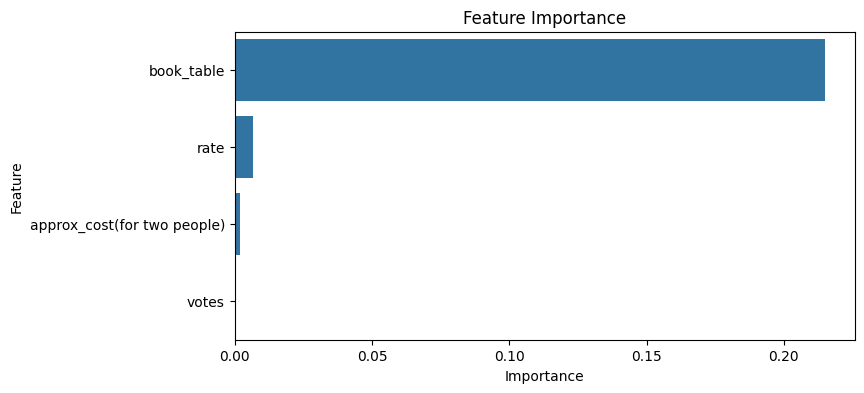

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': abs(model_lr.coef_[0])})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



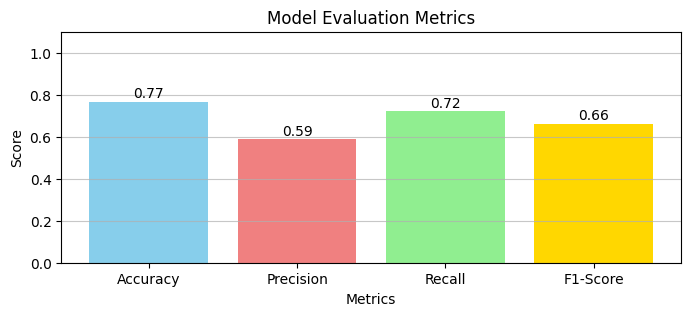

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred_test, average='weighted')

metrics = {'Accuracy': accuracy_test, 'Precision': precision, 'Recall': overall_recall, 'F1-Score': overall_f1}
plt.figure(figsize=(8, 3))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='-', alpha=0.7)

for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center')
plt.show()